In [120]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.api.preprocessing import image_dataset_from_directory

In [121]:
dataset = image_dataset_from_directory(
    "data",
    image_size=(224,224),        # Imagine size is állítható
    label_mode = "categorical",  # Ez kell a One-Hot-Encoding-hoz
)

Found 36843 files belonging to 100 classes.


# Most elkészítek egy olyan táblát, amely tartalmazza ONE_HOT_ENCODE olva a képeken található osztályokat és így készítés egy DataFramet belőle (y_species_df)

In [122]:
class_names = dataset.class_names # Osztályok neve
all_labels = [] # Ebbe lesznek a sorok beolvasva
for images, labels in dataset:
    # Hozzáadjuk a címkéket a listához
    all_labels.append(labels.numpy())  # Sorok beolvasása (1 sor egy kép)
    
all_labels = np.vstack(all_labels) # Egymás alá teszem a sorokat
y_species_df = pd.DataFrame(all_labels) # DataFramé alakítom
y_species_df.columns = class_names # Az oszlopneveket átírom
y_species_df.head() 

,Agaricus augustus,Agaricus impudicus,Agaricus sylvaticus,Agrocybe pediades,Atheniella adonis,Calocera furcata,Chlorophyllum olivieri,Cladonia foliacea,Cladonia rangiformis,Clavulina coralloides,...,Stropharia cyanea,Tremella encephala,Tricholoma argyraceum,Tricholoma lascivum,Tricholoma terreum,Tubaria furfuracea,Xerocomellus pruinatus,Xylaria hypoxylon,Xylodon radula,Xylodon raduloides
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
y_species_df.shape

(36843, 100)

# Példa kirajzolás

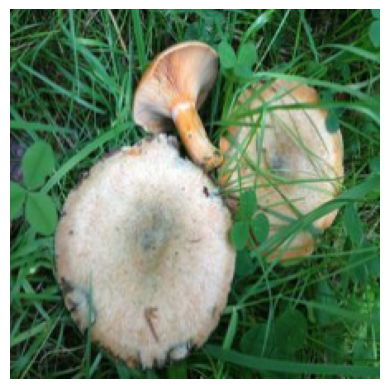

In [124]:
import matplotlib.pyplot as plt

for images, labels in dataset.take(1):  
    first_image = images[0] 
    plt.imshow(first_image.numpy().astype("uint8"))
    plt.axis("off") 
    plt.show()
